# Cluster Anomalies

In [70]:
# imports
import numpy as np
import pandas

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering

from siosandbox.cugn import io as cugn_io
from siosandbox.cugn import grid_utils
from siosandbox.cugn import figures

# Load data

In [5]:
line='90'
pcut = 98
grid_outliers, grid_tbl, ds = grid_utils.gen_outliers(line, pcut)

# Plot a year

In [10]:
year = 2017
# Time conveniences
ptimes = pandas.to_datetime(grid_outliers.times.values)
months = ptimes.month

# Plot a year
in_year = ptimes.year == year
all_gd = in_year

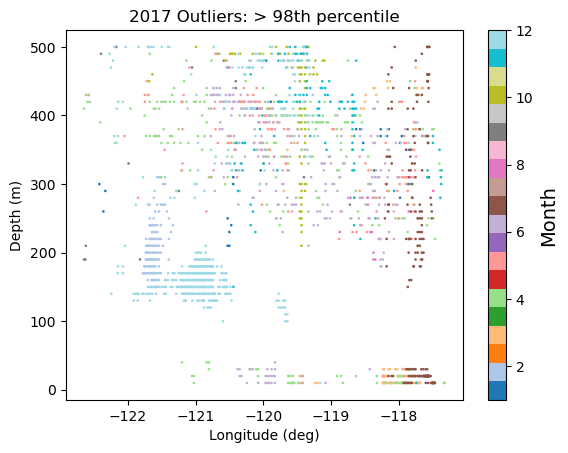

In [13]:
yval = grid_outliers.z[all_gd]
ylbl = 'Depth (m)'
figures.outlier_by_months(None, pcut, year,
        grid_outliers.lon.values[all_gd], yval, months[all_gd], ylbl=ylbl)

# Grab that year only

In [16]:
grid_year = grid_outliers[in_year].copy()
grid_year.head()

,depth,profile,row,col,doxy,doxy_p,times,lon,z,SA,sigma0,chla
428,0,32603,8,17,271.433326,99.404762,2017-02-01 03:39:32,-117.753245,10,33.139081,24.504415,0.831730
457,0,32632,8,17,270.994527,98.809524,2017-02-03 16:14:25,-118.194357,10,33.134276,24.491252,0.520608
739,0,32915,17,23,262.626988,98.569726,2017-03-09 01:01:53,-119.233425,10,33.498791,25.002377,0.740545
740,0,32916,16,22,264.967930,99.410898,2017-03-09 03:58:30,-119.203970,10,33.487203,24.940452,0.815661
782,0,32958,15,18,277.438868,99.488491,2017-03-14 02:17:03,-118.227115,10,33.434623,24.549290,0.285907


# Build the 3D space for clustering

## Time

In [67]:
ptimes = pandas.to_datetime(grid_year.times.values)
mjd = ptimes.to_julian_date()
months = ptimes.month

In [26]:
t = mjd - mjd.min()
tscl = t / 3.
tscl.max()

118.79123456791665

## Lon

In [31]:
dl = (grid_year.lon.max() - grid_year.lon) 
lscl = dl.values * 100 / dl.max()
lscl.min(), lscl.max()

(0.0, 100.00000000000001)

## Depth

In [32]:
zscl = grid_year.z.values / 5
zscl.min(), zscl.max()

(2.0, 100.0)

## Package

In [37]:
X = np.zeros((len(grid_year), 3))

In [40]:
X[:,0] = tscl
X[:,1] = lscl
X[:,2] = zscl

# Run

In [54]:
clustering = AgglomerativeClustering(n_clusters=None,
    distance_threshold=20)

In [55]:
clustering.fit(X)

AgglomerativeClustering(distance_threshold=20, n_clusters=None)

In [56]:
np.unique(clustering.labels_)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163])

In [63]:
grid_year['cluster'] = clustering.labels_

In [64]:
grid_year

,depth,profile,row,col,doxy,doxy_p,times,lon,z,SA,sigma0,chla,label,cluster
428,0,32603,8,17,271.433326,99.404762,2017-02-01 03:39:32,-117.753245,10,33.139081,24.504415,0.831730,115,115
457,0,32632,8,17,270.994527,98.809524,2017-02-03 16:14:25,-118.194357,10,33.134276,24.491252,0.520608,115,115
739,0,32915,17,23,262.626988,98.569726,2017-03-09 01:01:53,-119.233425,10,33.498791,25.002377,0.740545,149,149
740,0,32916,16,22,264.967930,99.410898,2017-03-09 03:58:30,-119.203970,10,33.487203,24.940452,0.815661,149,149
782,0,32958,15,18,277.438868,99.488491,2017-03-14 02:17:03,-118.227115,10,33.434623,24.549290,0.285907,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945996,49,35956,38,46,24.897252,98.401053,2017-12-17 14:47:32,-121.624335,500,34.351541,26.955770,0.031182,106,106
946005,49,35967,38,46,25.121627,98.777276,2017-12-18 20:37:51,-121.390545,500,34.353172,26.944943,0.028456,106,106
946057,49,36021,40,46,19.440583,99.620473,2017-12-25 00:44:18,-119.904525,500,34.441566,26.950522,0.031352,7,7
946058,49,36022,40,46,18.903047,98.840335,2017-12-25 03:36:44,-119.870013,500,34.440393,26.963376,0.035676,7,7


## Check July 2017

In [68]:
jul17 = (grid_year.z < 100.) & (months >= 6) & (months <= 8) & (grid_year.lon > -118.)
np.sum(jul17)

83

In [75]:
grid_year[jul17].head()

,depth,profile,row,col,doxy,doxy_p,times,lon,z,SA,sigma0,chla,label,cluster
1695,0,33871,19,20,267.438006,98.126951,2017-07-02 11:55:54,-117.927422,10,33.582257,24.749357,1.179832,15,15
1696,0,33872,18,21,279.786923,98.927039,2017-07-02 14:54:38,-117.908775,10,33.548827,24.865383,0.816227,15,15
1697,0,33873,18,20,274.736441,98.473282,2017-07-02 17:51:24,-117.890637,10,33.546482,24.730201,0.338896,15,15
1698,0,33874,19,16,279.086719,99.310345,2017-07-02 20:55:37,-117.870172,10,33.592943,24.413582,0.384488,15,15
1699,0,33875,19,18,280.506798,99.350649,2017-07-02 23:58:14,-117.847572,10,33.591946,24.561482,1.138205,15,15


## Examine

<Axes: xlabel='lon', ylabel='z'>

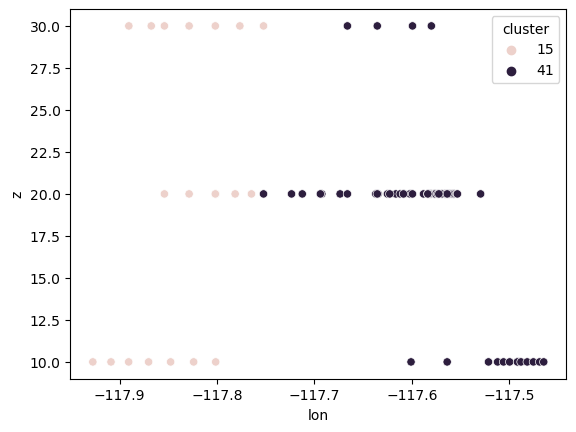

In [71]:
sns.scatterplot(grid_year[jul17], x='lon', y='z', hue='cluster')

## Check low DO

In [76]:
lowDO = (grid_year.z < 200) & (grid_year.z > 100.) & (grid_year.lon > -130.) & (
    grid_year.lon < -120.5)

<Axes: xlabel='lon', ylabel='z'>

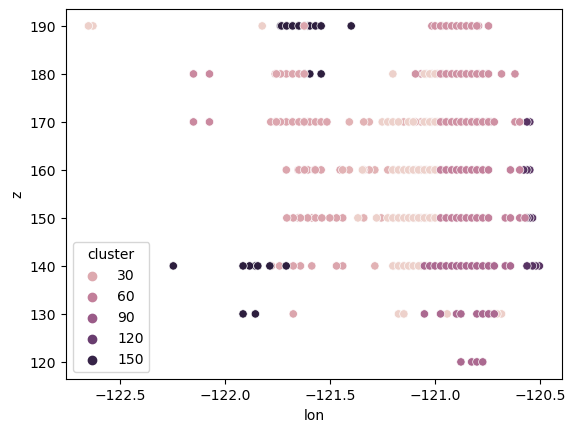

In [77]:
sns.scatterplot(grid_year[lowDO], x='lon', y='z', hue='cluster')

In [79]:
c30 = grid_year.cluster == 30
grid_year[c30].head()

,depth,profile,row,col,doxy,doxy_p,times,lon,z,SA,sigma0,chla,label,cluster
531599,27,35839,33,41,116.257783,98.295033,2017-12-04 05:38:37,-121.015713,280,34.147183,26.542316,0.010778,30,30
531610,27,35850,33,41,115.897486,98.146775,2017-12-05 11:47:52,-121.313970,280,34.150884,26.530026,0.013040,30,30
531612,27,35852,33,41,116.119315,98.220904,2017-12-05 17:17:01,-121.374003,280,34.155083,26.515905,0.015626,30,30
550997,28,35833,33,42,104.513499,99.207607,2017-12-03 13:02:53,-120.872200,290,34.160557,26.600704,0.018878,30,30
551013,28,35849,33,41,117.769322,98.986904,2017-12-05 09:02:18,-121.287410,290,34.148498,26.526520,0.016600,30,30


In [80]:
c60 = grid_year.cluster == 60
grid_year[c60].head()

,depth,profile,row,col,doxy,doxy_p,times,lon,z,SA,sigma0,chla,label,cluster
957,0,33133,16,14,254.895407,98.888889,2017-04-08 16:23:50,-117.832152,10,33.477126,24.278259,0.103571,60,60
959,0,33135,16,13,251.773253,98.412698,2017-04-08 21:57:55,-117.869325,10,33.474477,24.188975,0.106879,60,60
961,0,33137,17,15,258.928529,98.039216,2017-04-09 03:32:48,-117.916190,10,33.497139,24.350353,0.187239,60,60
962,0,33138,17,17,270.101911,99.372385,2017-04-09 06:20:08,-117.944677,10,33.514465,24.513763,0.319463,60,60
963,0,33139,17,17,271.135380,99.790795,2017-04-09 09:11:05,-117.977302,10,33.518685,24.530509,0.306968,60,60
